In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
allData = pd.read_csv("LAHacks Deidentified.csv")

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
allData.head()

,UPC,Category Name,Vendor Name,Receiving Warehouse,Shipping Warehouse,PO,Total Cases,Failed Cases,Inspector,Arrival Date,Shipping Date
0,4.856800e+05,White Cabbages,Vendor 63b9d36c,Warehouse 886ecdf1,Warehouse e5847f7c,248117,385,0,Inspector 4bb23bf2,15-MAR-18,12-MAR-18
1,7.143000e+09,Unassigned,Vendor ee6aa404,Warehouse cb7cd2e2,Warehouse 773064a8,50246763,5,0,Inspector c8d7555b,31-AUG-18,30-AUG-18
2,7.143001e+09,Unassigned,Vendor ee6aa404,Warehouse cb7cd2e2,Warehouse 773064a8,50246763,10,0,Inspector c8d7555b,31-AUG-18,30-AUG-18
3,7.143001e+09,Unassigned,Vendor ee6aa404,Warehouse cb7cd2e2,Warehouse 773064a8,50246763,100,0,Inspector c8d7555b,31-AUG-18,30-AUG-18
4,7.143000e+09,Unassigned,Vendor ee6aa404,Warehouse cb7cd2e2,Warehouse 773064a8,50246763,5,0,Inspector c8d7555b,31-AUG-18,30-AUG-18


In [9]:
allData.shape

(227619, 11)

In [29]:
Dates = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
Conversion = {}

In [30]:
index = 1
for date in Dates:
    Conversion[date] = index
    index += 1

In [31]:
Conversion

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [22]:
lessDat = allData[1:10000]

In [25]:
lessDat["Arrival Date"]

1       31-AUG-18
2       31-AUG-18
3       31-AUG-18
4       31-AUG-18
5       31-AUG-18
6       31-AUG-18
7       31-AUG-18
8       31-AUG-18
9       31-AUG-18
10      31-AUG-18
11      31-AUG-18
12      31-AUG-18
13      31-AUG-18
14      31-AUG-18
15      31-AUG-18
16      31-AUG-18
17      31-AUG-18
18      31-AUG-18
19      31-AUG-18
20      31-AUG-18
21      31-AUG-18
22      31-AUG-18
23      31-AUG-18
24      31-AUG-18
25      31-AUG-18
26      31-AUG-18
27      31-AUG-18
28      31-AUG-18
29      31-AUG-18
30      31-AUG-18
          ...    
9970    24-SEP-18
9971    24-SEP-18
9972    24-SEP-18
9973    24-SEP-18
9974    24-SEP-18
9975    24-SEP-18
9976    24-SEP-18
9977    24-SEP-18
9978    24-SEP-18
9979    24-SEP-18
9980    24-SEP-18
9981    24-SEP-18
9982    24-SEP-18
9983    24-SEP-18
9984    24-SEP-18
9985    24-SEP-18
9986    24-SEP-18
9987    24-SEP-18
9988    24-SEP-18
9989    24-SEP-18
9990    24-SEP-18
9991    24-SEP-18
9992    24-SEP-18
9993    24-SEP-18
9994    24

In [52]:
testStr = "24-SEP-18"
def convertDate(testStr):
    testArr = testStr.split("-")
    if testArr[1] in Conversion.keys():
        return Conversion[testArr[1]] + int(testArr[0])/31

In [53]:
convertDate(testStr)

9.774193548387096

In [59]:
col = [convertDate(x) for x in lessDat['Arrival Date']]
lessDat["convtime"] = col

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
convDat = lessDat.groupby(['Category Name']).mean()

In [64]:
convDat

,UPC,Total Cases,Failed Cases,convtime
Category Name,,,,
Aloe Vera,3.683810e+05,2.000000,0.000000,9.225806
Anise,4.716270e+05,4.000000,0.000000,9.370968
Apples,4.658019e+09,78.150943,0.000000,7.271455
Aubergines,4.904058e+05,17.714286,0.000000,7.626728
Avocados ? Pebbled Peel (Hass-Type),6.053562e+05,153.444444,0.000000,5.143369
Baby Bananas,4.312607e+09,20.000000,0.000000,5.451613
Bananas,5.341072e+05,695.933333,0.000000,5.738710
Basil,2.976723e+10,42.600000,0.000000,9.441935
Beetroot,1.969908e+09,9.250000,0.000000,7.967742


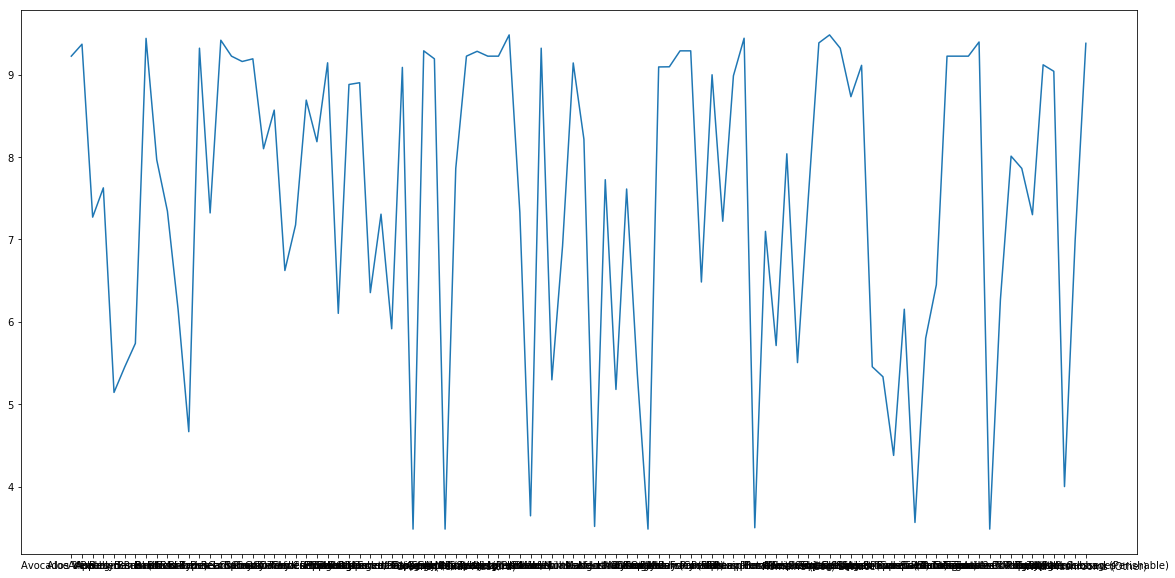

In [74]:
plt.figure(figsize=(20,10))
plt.plot(convDat['convtime'])

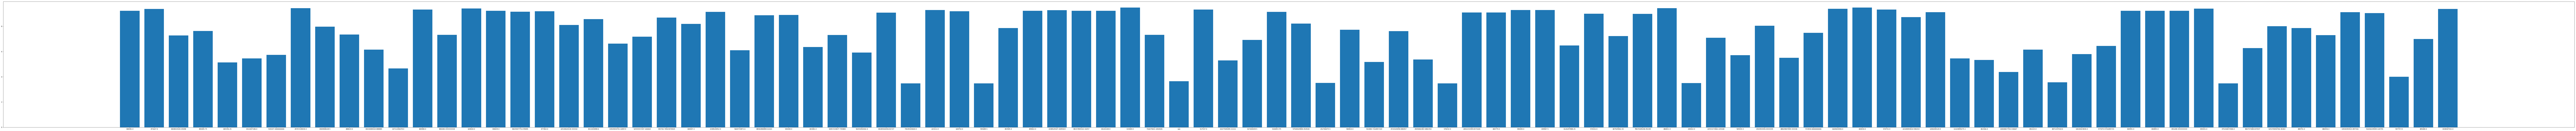

In [90]:
x = np.arange(len(convDat["UPC"]))
fig, ax = plt.subplots(figsize=(300,15))
plt.bar(x, convDat["convtime"])
plt.xticks(x, convDat["UPC"])
plt.show()
plt.sav